<a href="https://colab.research.google.com/github/Hhanen07/HighLevelProgramming2021/blob/origin%2FProjectLIFE/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game of Life


### Description

The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


### Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Increase the size of the GoF's world and play with more advanced and complex patterns
* Analyse the evolutions of the patterns in terms of frequency, replication, occupancy, etc.

# Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML, display
from PIL import Image
import cv2

#Create Board
First we have to create an empty Grid of size N using the **create_grid** function then we have to add our **pattern** ,which is the starting shape, to our board.

In order to **center** our pattern into the grid we use the function **add_pattern_start**.

In [ ]:
#N : size of the grid
def create_grid(N, pattern=[[0, 1, 0],[1, 1, 1],[0, 1, 0]]):
  grid = np.zeros((N, N)) #create empty board
  grid = add_pattern_start(grid, pattern) #place pattern in the center of the board
  return grid


In [ ]:
def add_pattern_start(grid, pattern):

  #Dimension of the pattern
  columns = np.size(pattern,axis=0)
  lines = np.size(pattern,axis=1)

  # Get number of lines==columns
  N = np.size(grid,axis=1)

  #Put the pattern in the center of the grid
  if (columns % 2) == 0 and (lines % 2) == 0:
    grid[N//2 - columns//2:N//2 + columns//2, N//2 - lines//2 : N//2 + lines//2] = pattern
  elif (columns % 2) == 0 and (lines % 2) != 0:
    grid[N//2 - columns//2:N//2 + columns//2, N//2 - lines//2 : N//2 + lines//2 + 1] = pattern
  elif (columns % 2) != 0 and (lines % 2) == 0:
    grid[N//2 - columns//2:N//2 + columns//2 + 1, N//2 - lines//2 : N//2 + lines//2] = pattern
  else:
    grid[N//2 - columns//2:N//2 + columns//2 + 1, N//2 - lines//2 : N//2 + lines//2 + 1] = pattern

  return grid

In [ ]:
#Creating the paterns image

#block
block=np.array([
    [1,1],
    [1,1]
    ],np.uint8)
data = Image.fromarray(255*(1-block))
data.save('block.png')

#bee-hive
bee_hive=np.array([
    [0,1,1,0],
    [1,0,0,1],
    [0,1,1,0]
    ],np.uint8)
data = Image.fromarray(255*(1-bee_hive))
data.save('bee_hive.png')

#loaf

loaf=np.array([
    [0,1,1,0],
    [1,0,0,1],
    [0,1,0,1],
    [0,0,1,0]
    ],np.uint8)
data = Image.fromarray(255*(1-loaf))
data.save('loaf.png')

#Boat

Boat=np.array([
    [1,1,0,0],
    [1,0,1,0],
    [0,1,0,0]
    ],np.uint8)
data = Image.fromarray(255*(1-Boat))
data.save('Boat.png')

#tub

tub=np.array([
    [0,1,0,0],
    [1,0,1,0],
    [0,1,0,0]
    ],np.uint8)
data = Image.fromarray(255*(1-tub))
data.save('tub.png')

#blinker

blinker=np.array([
    [1,1,1]
    ],np.uint8)
data = Image.fromarray(255*(1-blinker))
data.save('blinker.png')

#toad

toad=np.array([
    [0,1,1,1],
    [1,1,1,0]
    ],np.uint8)
data = Image.fromarray(255*(1-toad))
data.save('toad.png')

#beacon

beacon=np.array([
    [1,1,0,0],
    [1,1,0,0],
    [0,0,1,1],
    [0,0,1,1]
    ],np.uint8)
data = Image.fromarray(255*(1-beacon))
data.save('beacon.png')

#pulsar

pulsar=np.array([
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,1,1,1,0,0]
    ],np.uint8)
data = Image.fromarray(255*(1-pulsar))
data.save('pulsar.png')

#penta-decathlon

penta_decathlon=np.array([
    [0,0,1,0,0,0,0,1,0,0],
    [1,1,0,1,1,1,1,0,1,1],
    [0,0,1,0,0,0,0,1,0,0]
    ],np.uint8)
data = Image.fromarray(255*(1-penta_decathlon))
data.save('penta_decathlon.png')

#glider

glider=np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1]
    ],np.uint8)
data = Image.fromarray(255*(1-glider))
data.save('glider.png')

#heavy_weight_spaceship

heavy_weight_spaceship=np.array([
    [0,0,0,1,1,0,0],
    [0,1,0,0,0,0,1],
    [1,0,0,0,0,0,0],
    [1,0,0,0,0,0,1],
    [1,1,1,1,1,1,0]
    ],np.uint8)
data = Image.fromarray(255*(1-heavy_weight_spaceship))
data.save('heavy_weight_spaceship.png')

#light_weight_spaceship

light_weight_spaceship=np.array([
    [0,1,0,0,1],
    [1,0,0,0,0],
    [1,0,0,0,1],
    [1,1,1,1,0]
    ],np.uint8)
data = Image.fromarray(255*(1-light_weight_spaceship))
data.save('light_weight_spaceship.png')

#Gosper glider gun

Gosper_glider_gun=np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    ],np.uint8)

data = Image.fromarray(255*(1-Gosper_glider_gun))
data.save('Gosper_glider_gun.png')

#diehard

diehard=np.array([
    [0,0,0,0,0,0,1,0],
    [1,1,0,0,0,0,0,0],
    [0,1,0,0,0,1,1,1]
    ],np.uint8)
data = Image.fromarray(255*(1-diehard))
data.save('diehard.png')

# How to play

In order to start our game we have to play by the rules.

This where the function **animate** comes in, for it is the engine of our game.

We first start by copying the original board so not to modify it and then we apply the rules  of the game to our new board to creat the next generation, and here is where we use the function **count_neighbours**, for it helps us count the number of cells alive around a specific cell that we are working on.

In [ ]:
def animate(i, grid, img = None): 
  #Size of the grid
  N = np.size(grid,axis=0)

  #To not modify the original one
  grid_tmp = grid.copy() 

  #Play the game for the current round on the new board we just copied
  for i in range(N):
    for j in range(N):
      #Get the numbers of neighbours
      neighbours = count_neighbours(grid, (i,j))
      #Apply Gof rules
      if grid[i,j] == 1: #if a cell is alive
        if neighbours < 2 or neighbours > 3: # and has less than 2  or more than 3 cells alive around it
          grid_tmp[i,j] = 0 #then we need to terminated said cell
      else: #if a cell is not alive
        if neighbours == 3:  #and had exactly 3 alive cells around it
          grid_tmp[i,j] = 1 #then in the next round that cell is generated
  
  #Update the grid
  grid[:] = grid_tmp[:]
  #Update the image with the new grid
  if img != None: 
    img.set_data(grid) 

  return grid, img

In [ ]:
def count_neighbours(grid, position):
  i,j = position
  #neighbours's matrix of the position i,j 
  neighbour_cells = np.array([[i - 1, j - 1], [i - 1, j + 0], [i - 1, j + 1],
                              [i + 0, j - 1],                 [i + 0, j + 1],
                              [i + 1, j - 1], [i + 1, j + 0], [i + 1, j + 1]])

  count = 0
  N = np.size(grid,axis=1)
  #Count of the neighbours
  for i,j in neighbour_cells:
    if i >= 0 and j >= 0 and i < N and j < N:
      count += grid[i,j]

  return count

# Let's Play
In  this section, we define the **main** function where we upload the image that's going to five us the pattern that we  want to start with.

The we are going to apply the rules of the game and dispaly the results of each round in a **video** and a **Gif**

In [ ]:
def main(image_name,fra=50,I=300,size=50):
  img = cv2.imread(image_name+'.png', 0)  #upload the image
  mat = np.zeros(np.shape(img), dtype=np.uint8) 
  mat[img == 0 ] = 1  #extract the pattern
  grid = create_grid(max(max(np.shape(img)),size), mat) #create the starting grid
  fig, ax = plt.subplots(figsize=(8, 8))
  img = ax.imshow(grid, cmap='binary')
  ax.set_xticks([])
  ax.set_yticks([])


  anim = animation.FuncAnimation(fig, animate, frames=fra, fargs=(grid,img), interval=I) #play the game
  display(HTML(anim.to_html5_video())) #display the video

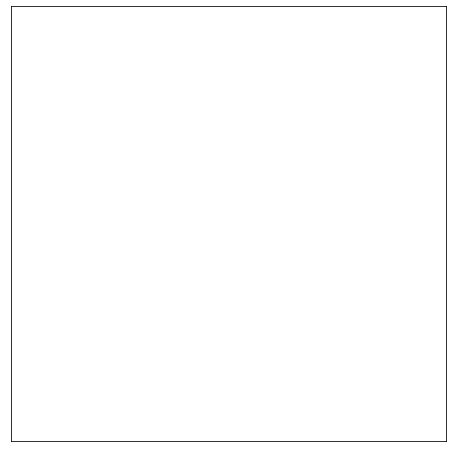

In [ ]:
if __name__ == '__main__':
  main('diehard',fra=140,I=30,size=50)

# Analysis
In this part, we are going to analyse the evolutions of these patterns throught the game as in for each round in terms of frequency occupancy and replication.


## Occupancy
The occupancy is how many alive cells there are at every step of the game

In [ ]:
def occupancy(image_name,iter=50):
  img = cv2.imread(image_name+'.png', 0)
  mat = np.zeros(np.shape(img), dtype=np.uint8)
  mat[img == 0 ] = 1
  grid = create_grid(max(max(np.shape(img)),50), mat)

  #List of number of cells alive
  count_cells_alive = [np.count_nonzero(grid)]

  for i in range(iter):
    grid, _ = animate(0, grid)
    count_cells_alive.append(np.count_nonzero(grid))

  iterations=[i for i in range(iter+1)]
  fig,ax = plt.subplots()
  plt.plot(iterations,count_cells_alive,linestyle="-",linewidth=1)
  plt.xlabel('Iterations')
  plt.ylabel('Occupancy')
  ax.set_xticks(iterations)
  plt.title(image_name+", occupancy per iteration")
  plt.legend()
  plt.savefig("occupancy.png")
  plt.show()


  return count_cells_alive

No handles with labels found to put in legend.


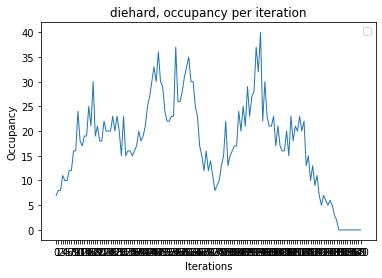

[7, 8, 8, 11, 10, 10, 12, 12, 16, 16, 24, 18, 17, 19, 19, 25, 21, 30, 19, 21, 18, 18, 22, 20, 20, 20, 23, 20, 23, 20, 15, 23, 15, 16, 16, 15, 16, 17, 20, 18, 19, 21, 25, 27, 30, 33, 30, 36, 30, 29, 24, 22, 22, 23, 23, 37, 26, 26, 28, 31, 33, 35, 30, 30, 25, 23, 17, 15, 12, 16, 12, 14, 11, 8, 9, 10, 13, 15, 22, 13, 15, 16, 17, 17, 24, 20, 25, 21, 29, 23, 27, 28, 37, 32, 40, 22, 30, 23, 21, 21, 23, 17, 21, 17, 16, 16, 20, 15, 23, 18, 21, 20, 23, 20, 22, 13, 15, 10, 13, 9, 11, 7, 5, 7, 6, 5, 6, 5, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
occ = occupancy('diehard',140)

#TODO : Plot the alive cells number depending on time of interesting pattern  

##Frequency
The frequency is the number of cycles required to return to the original configuration, if any

### None spaceship patern

In [ ]:
#used to calculate freqency of none spaship patern

def frequency(image_name,n_max=50):
  img = cv2.imread(image_name+'.png', 0)
  mat = np.zeros(np.shape(img), dtype=np.uint8)
  mat[img == 0 ] = 1
  grid_start = create_grid(max(max(np.shape(img)),50), mat)

  #To save the original grid
  grid_temp = grid_start.copy()
  pattern_name = ""
  #frequency = 0

  t = []

  for periode in range(n_max):
    grid_temp, _ = animate(0, grid_temp)
 
    if np.array_equal(grid_temp, grid_start) and periode == 0:
      pattern_name = "still_lifes"
      periode += 1
      return 1/periode, pattern_name

    if np.array_equal(grid_temp, grid_start) and periode > 0:
      pattern_name = "oscillator"
      periode += 1
      return 1/periode, pattern_name

In [ ]:
freq = frequency('blinker')
print(freq)

(0.5, 'oscillator')


### Spacehip patern

In [ ]:

#find if the same patern is present in two grid and calculate the disance between them
def shearch_spaceshipe(grid1,grid2):
  #reducing the grid patern to a smaller grid containing the patern
  x1,y1=np.where(grid1 == 1)
  patern1=grid1[min(x1):max(x1)+1,min(y1):max(y1)+1]

  x2,y2=np.where(grid2 == 1)
  patern2=grid2[min(x2):max(x2)+1,min(y2):max(y2)+1]
  
  #relative position between the two patern (only use if th patern are equal)
  position=np.array([min(x2)-min(x1),min(y2)-min(y1)])

  return(np.array_equal(patern1,patern2),position)

#find the freqency, the speed and the type of a patern
def frequency_speed_spaceshipe(image_name,n_max=50): #find frequency of spaceshipes (also works for blinkers)
  img = cv2.imread(image_name+'.png', 0)
  mat = np.zeros(np.shape(img), dtype=np.uint8)
  mat[img == 0 ] = 1
  grid_start = create_grid(max(max(np.shape(img)),50), mat)

  #To save the original grid
  grid_temp = grid_start.copy()

  for periode in range(n_max):
    grid_temp, _ = animate(0, grid_temp)
 
    

    if np.array_equal(grid_temp, grid_start) and periode == 0:
      pattern_name = "still_lifes"
      periode += 1
      return 1,np.array([0,0]), pattern_name

    if np.array_equal(grid_temp, grid_start):
      pattern_name = "oscillator"
      periode += 1
      return 1/periode,np.array([0,0]), pattern_name

    equal,distance=shearch_spaceshipe(grid_temp, grid_start)

    if equal:
      pattern_name = "spaceships"
      periode += 1
      speed=abs(distance)/periode
      return 1/periode,speed, pattern_name


In [ ]:
print(frequency_speed_spaceshipe('oscillator/blinker'))
print(frequency_speed_spaceshipe('spaceships/Glider'))
print(frequency_speed_spaceshipe('spaceships/light_weight_spaceship'))

(0.5, array([0, 0]), 'oscillator')
(0.25, array([0.25, 0.25]), 'spaceships')
(0.25, array([0. , 0.5]), 'spaceships')


## Replication
The replication or heat is the average number of cells that change state at each generation.

In [ ]:
def replication(image_name,periode=True,iter=200):
  #if the motif is periodic we observe it on 2 periode
  if periode:
    f,_,_=frequency_speed_spaceshipe(image_name)
    iteration=2*(round(1/f))
  else:
    iteration=iter
  
  img = cv2.imread(image_name+'.png', 0)
  mat = np.zeros(np.shape(img), dtype=np.uint8)
  mat[img == 0 ] = 1
  grid = create_grid(max(max(np.shape(img)),20), mat)

  #To save the original grid
  grid_next = grid.copy()
  birth = []
  death =[]
  change = []

  for i in range(iteration):
    grid_next, _ = animate(0, grid_next)
    #Check how many elements are equal in two numpy arrays
    birth.append(np.sum( np.logical_or(grid_next,grid)- grid))
    death.append(np.sum( np.logical_or(grid_next,grid)- grid_next))
    change.append(birth[-1]+death[-1])
    #grid is the new reference
    grid = grid_next.copy()

  return (birth,death,change)

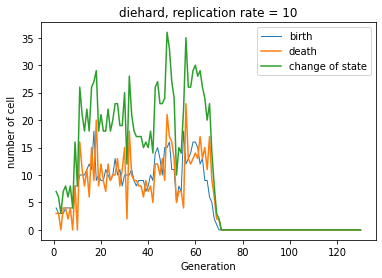

In [ ]:
name="diehard"
birth,death,change = replication(name,False,130)
generation=[i+1 for i in range(len(change))]
fig,ax = plt.subplots()
plt.plot(generation,birth,label="birth",linestyle="-",linewidth=1)
plt.plot(generation,death,label="death",linestyle="-")
plt.plot(generation,change,label="change of state")
plt.xlabel('Generation')
plt.ylabel('number of cell')
#ax.set_xticks(generation)
plt.title(name+", replication rate = {:.0f}".format(np.mean(change)))
plt.legend()
plt.savefig("replication_"+name+".png")
plt.show()